<a href="https://colab.research.google.com/github/JJungEEun/lotte_project/blob/jarae/%EC%A4%91%EB%B6%84%EB%A5%98_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/lotte/m_pd.csv')

In [3]:
df.head()

,Unnamed: 0,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm
0,0,M0058,0.266,0.233,0.167,0.717,45.116,0.012,0.005,0.392
1,1,M0298,0.171,0.595,0.022,0.693,44.487,0.013,0.002,0.147
2,2,M0174,0.263,0.365,0.082,0.737,44.129,0.041,0.031,0.770
3,3,M0057,0.178,0.541,0.048,0.711,47.588,0.008,0.001,0.133
4,4,M0040,0.146,0.437,0.080,0.718,44.527,0.001,0.000,0.175


이전 작업 불러옴.

#k-means

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
del df['Unnamed: 0']

In [6]:
df

,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm
0,M0058,0.266,0.233,0.167,0.717,45.116,0.012,0.005,0.392
1,M0298,0.171,0.595,0.022,0.693,44.487,0.013,0.002,0.147
2,M0174,0.263,0.365,0.082,0.737,44.129,0.041,0.031,0.770
3,M0057,0.178,0.541,0.048,0.711,47.588,0.008,0.001,0.133
4,M0040,0.146,0.437,0.080,0.718,44.527,0.001,0.000,0.175
...,...,...,...,...,...,...,...,...,...
324,M0077,0.089,0.622,0.178,0.800,38.778,0.006,0.000,0.002
325,M0042,0.105,0.629,0.021,0.783,45.979,0.001,0.000,0.078
326,M0266,0.083,0.505,0.021,0.383,42.204,0.010,0.009,0.871
327,M0326,0.136,0.730,0.000,0.491,43.303,0.010,0.000,0.011


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [10]:
import seaborn as sns

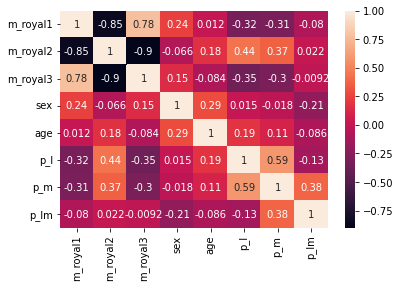

In [11]:
correl=df.corr()
sns.heatmap(correl,annot=True)

흠..

In [12]:
df.columns

Index(['m_pd', 'm_royal1', 'm_royal2', 'm_royal3', 'sex', 'age', 'p_l', 'p_m',
       'p_lm'],
      dtype='object')

In [16]:
features = ['m_royal1', 'm_royal2', 'm_royal3', 'sex', 'age', 'p_l', 'p_m','p_lm']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['m_pd']].values
# Standardizing the features
x1 = MinMaxScaler().fit_transform(x)
x2=StandardScaler().fit_transform(x)

In [19]:
print(x1[0],x2[0])

[0.43678161 0.25633383 0.5154321  0.70529801 0.52640339 0.12371134
 0.15151515 0.39217653] [ 0.60060293 -1.25660543  1.31100474  0.01368215  0.04254799 -0.36225143
  0.3685924   1.0551717 ]


두개 다 가져가보려 합니다

민맥스

In [50]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pc1 = pca1.fit_transform(x1)
pcdf1 = pd.DataFrame(data = pc1
             , columns = ['pc1_1', 'pc1_2'])

스탠다드

In [51]:
pca2 = PCA(n_components=2)
pc2 = pca2.fit_transform(x2)
pcdf2 = pd.DataFrame(data = pc2
             , columns = ['pc2_1', 'pc2_2'])

In [52]:
df1= pd.concat([pcdf1, df[['m_pd']]], axis = 1)

In [53]:
df2= pd.concat([pcdf2, df[['m_pd']]], axis = 1)

In [54]:
df1.head()

,pc1_1,pc1_2,m_pd
0,0.445819,0.052096,M0058
1,-0.187311,-0.171982,M0298
2,-0.069086,0.258402,M0174
3,-0.081867,-0.110569,M0057
4,0.081982,-0.214681,M0040


pc 두개와 상품명입니다

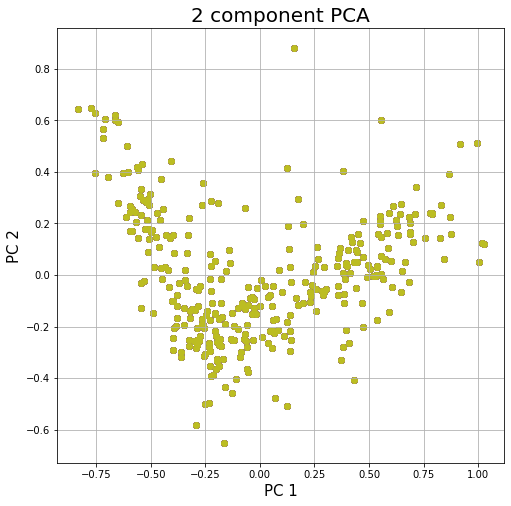

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target in df1.m_pd:
    ax.scatter(pcdf1.pc1_1,pcdf1.pc1_2)
ax.grid()

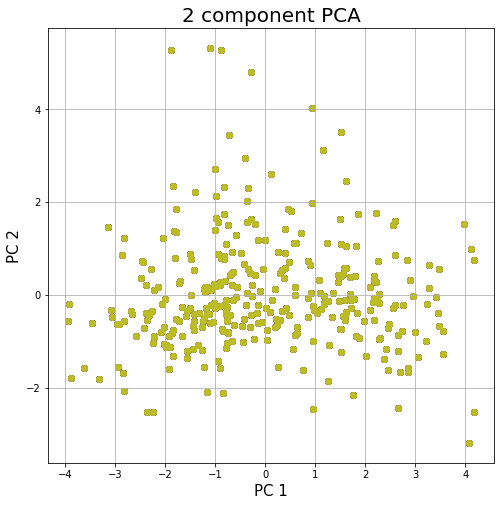

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target in df1.m_pd:
    ax.scatter(pcdf2.pc2_1,pcdf2.pc2_2)
ax.grid()

이거로봐선 StandardScaler보다 MinMaxScaler가 덜 랜덤한 분포를 보여줍니다

In [31]:
pca1.explained_variance_ratio_

array([0.51160656, 0.16577678])

In [32]:
pca2.explained_variance_ratio_

array([0.40078816, 0.1865671 ])

근데 분산 설명력이 좀 떨어지는 것 같기도? 특히 Standard는 60%가 안되네요.

3요소 짜리 pcdf3, pcdf4를 각각 만들어봅시다

In [58]:
pca3 = PCA(n_components=3)
pc3 = pca3.fit_transform(x1)
pcdf3 = pd.DataFrame(data = pc3
             , columns = ['pc3_1', 'pc3_2','pc3_3'])

df3= pd.concat([pcdf3, df[['m_pd']]], axis = 1)

In [81]:
pca4 = PCA(n_components=3)
pc4 = pca4.fit_transform(x2)
pcdf4 = pd.DataFrame(data = pc4
             , columns = ['pc4_1', 'pc4_2','pc4_3'])

df4 = pd.concat([pcdf4, df[['m_pd']]], axis = 1)

#pc1~4 비교

In [61]:
print("pc1 총분산: {1}, 분산: {0}".format(pca1.explained_variance_ratio_,round(sum(pca1.explained_variance_ratio_),3)))

pc1 총분산: 0.677, 분산: [0.51160656 0.16577678]


In [62]:
print("pc2 총분산: {1}, 분산: {0}".format(pca2.explained_variance_ratio_,round(sum(pca2.explained_variance_ratio_),3)))

pc2 총분산: 0.587, 분산: [0.40078816 0.1865671 ]


In [63]:
print("pc3 총분산: {1}, 분산: {0}".format(pca3.explained_variance_ratio_,round(sum(pca3.explained_variance_ratio_),3)))

pc3 총분산: 0.812, 분산: [0.51160656 0.16577678 0.13485337]


In [64]:
print("pc4 총분산: {1}, 분산: {0}".format(pca4.explained_variance_ratio_,round(sum(pca4.explained_variance_ratio_),3)))

pc4 총분산: 0.745, 분산: [0.40078816 0.1865671  0.15803256]


#3d 시각화?

In [47]:
from mpl_toolkits.mplot3d import Axes3D

In [73]:
pcdf3.columns

Index(['pc3_1', 'pc3_2', 'pc3_3'], dtype='object')

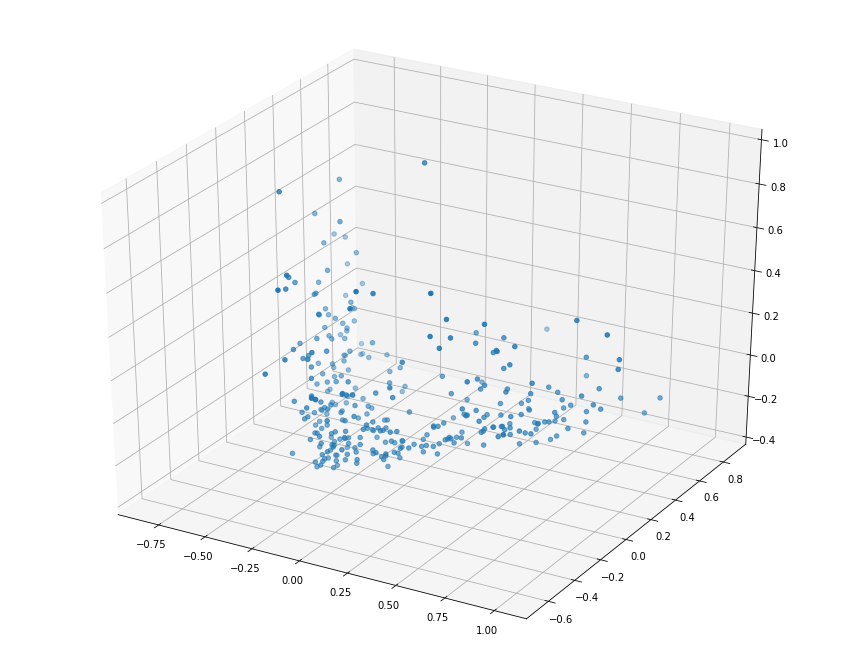

In [78]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pcdf3.pc3_1, pcdf3.pc3_2, pcdf3.pc3_3)

fig.set_size_inches(15,12)

plt.show()

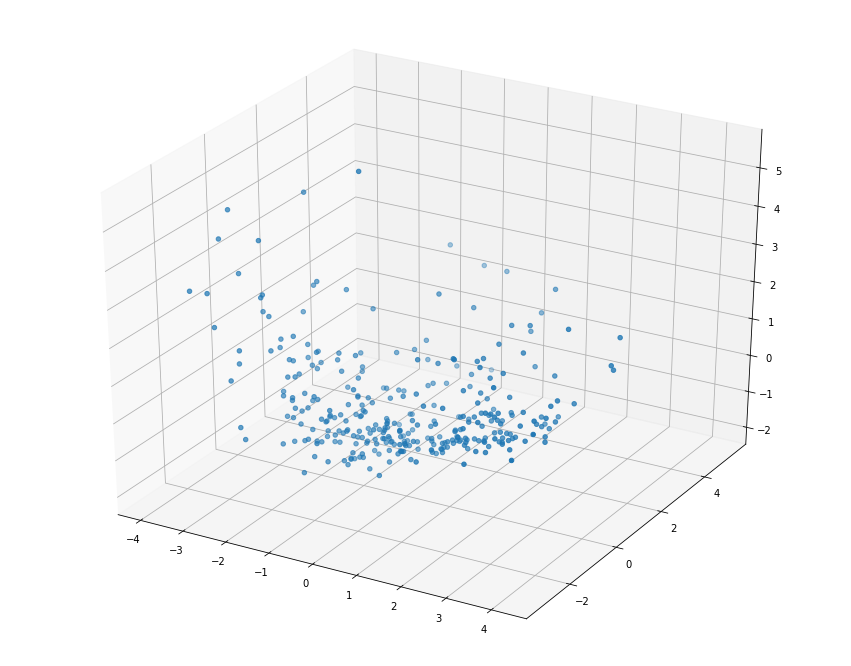

In [83]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pcdf4.pc4_1, pcdf4.pc4_2, pcdf4.pc4_3)

fig.set_size_inches(15,12)

plt.show()

확실히 이쪽이 평균 또는 극단쪽으로 분포하는 경향이 있습니다



---



#클러스터링

In [84]:
from sklearn.cluster import KMeans

kmean1=KMeans(n_clusters=10)
kmean1.fit(pcdf1)

KMeans(n_clusters=10)

민맥스 2요소

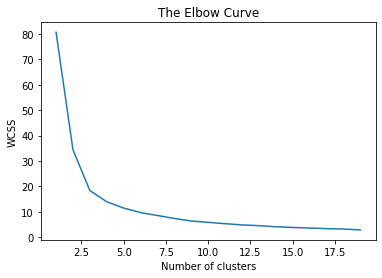

In [86]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pcdf1)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

스탠다드 2요소

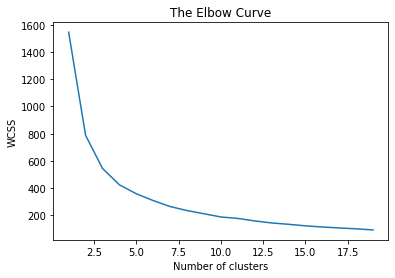

In [87]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pcdf2)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

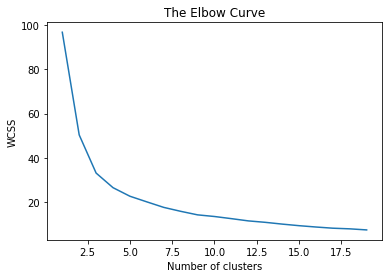

In [88]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pcdf3)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

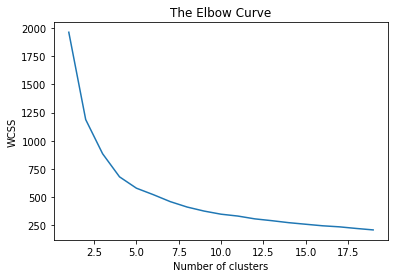

In [89]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pcdf4)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

2요소는 5전후, 3요소는 7~10까진 가야 할듯. 일단 10으로 해보자

In [94]:
kmeans1 = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans1.fit(pcdf1)

KMeans(n_clusters=10, random_state=0)

In [95]:
kmeans2 = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans2.fit(pcdf2)

KMeans(n_clusters=10, random_state=0)

In [101]:
kmeans3 = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans3.fit(pcdf3)

KMeans(n_clusters=10, random_state=0)

In [102]:
kmeans4 = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans4.fit(pcdf4)

KMeans(n_clusters=10, random_state=0)

In [115]:
temp=[1,1,1,3] #1~4번째 kmeans 모델의 분류
c=Counter(temp)
c.most_common(1)[0][1]/4

0.75

이런식으로 일치율을 보려 합니다

In [139]:
#일치 확률

consent=[]
uni_label=[]

from collections import Counter
for i in range(len(kmeans1.labels_)):
  temp=[kmeans1.labels_[i],kmeans2.labels_[i],kmeans3.labels_[i],kmeans4.labels_[i]]
  c=Counter(temp)
  uni_label.append(c.most_common(1)[0][0])
  consent.append((c.most_common(1)[0][0],c.most_common(1)[0][1]/4))

In [142]:
consent[:10]

[(6, 0.5),
 (0, 0.5),
 (6, 0.5),
 (0, 0.5),
 (8, 0.5),
 (9, 0.5),
 (6, 0.5),
 (2, 0.5),
 (6, 0.5),
 (1, 0.5)]

In [141]:
len(consent)

329

*모든 모델이 다르게 분류한 사례는 없음 (최소 0.5)

In [135]:
high_consent=[]
for i in range(len(consent)):
  if consent[i][1]>0.5: #적어도 둘 이상 동의
    high_consent.append(consent[i])

In [136]:
len(high_consent)

47

In [138]:
#85%가 최대 둘만 일치
47/329

0.14285714285714285

In [146]:
df['clust']=uni_label

In [147]:
df.tail()

,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm,clust
324,M0077,0.089,0.622,0.178,0.800,38.778,0.006,0.000,0.002,3
325,M0042,0.105,0.629,0.021,0.783,45.979,0.001,0.000,0.078,0
326,M0266,0.083,0.505,0.021,0.383,42.204,0.010,0.009,0.871,4
327,M0326,0.136,0.730,0.000,0.491,43.303,0.010,0.000,0.011,3
328,M0286,0.175,0.095,0.079,0.635,48.175,0.002,0.000,0.012,8


In [148]:
df.clust.value_counts() #그래도 대충 골고루 나뉜..? 편

0    63
1    51
8    47
3    37
5    29
9    28
2    27
6    20
4    14
7    13
Name: clust, dtype: int64

In [149]:
pd_name=pd.read_csv('/content/drive/MyDrive/lotte/new_df.csv')

In [152]:
del pd_name['Unnamed: 0']

In [153]:
pd_name

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm,l_pd,m_pd
0,PD0001,소파,가구,거실가구,L0001,M0008
1,PD0002,스툴/리빙의자,가구,거실가구,L0001,M0008
2,PD0003,탁자,가구,거실가구,L0001,M0008
3,PD0004,장식장/진열장,가구,거실가구,L0001,M0008
4,PD0005,기타가구,가구,기타가구,L0001,M0038
...,...,...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수,L0060,M0342
1929,PD1930,남성향수,화장품/뷰티케어,향수,L0060,M0342
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수,L0060,M0342
1931,PD1932,남성향수세트,화장품/뷰티케어,향수,L0060,M0342


In [158]:
pd_lm=pd_name[['clac_hlv_nm','clac_mcls_nm','m_pd']]

In [167]:
pd_lm=pd_lm[~pd_lm.duplicated()]

In [168]:
pd_lm

,clac_hlv_nm,clac_mcls_nm,m_pd
0,가구,거실가구,M0008
4,가구,기타가구,M0038
5,가구,사무용/학생용가구,M0131
9,가구,수납가구,M0153
12,가구,시공/DIY가구,M0171
...,...,...,...
1887,화장품/뷰티케어,메이크업,M0100
1901,화장품/뷰티케어,미용소품,M0108
1914,화장품/뷰티케어,선케어,M0142
1916,화장품/뷰티케어,스킨케어,M0166


In [170]:
data=pd.merge(df,pd_lm,on='m_pd',how='left')

In [172]:
df

,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm,clust
0,M0058,0.266,0.233,0.167,0.717,45.116,0.012,0.005,0.392,6
1,M0298,0.171,0.595,0.022,0.693,44.487,0.013,0.002,0.147,0
2,M0174,0.263,0.365,0.082,0.737,44.129,0.041,0.031,0.770,6
3,M0057,0.178,0.541,0.048,0.711,47.588,0.008,0.001,0.133,0
4,M0040,0.146,0.437,0.080,0.718,44.527,0.001,0.000,0.175,8
...,...,...,...,...,...,...,...,...,...,...
324,M0077,0.089,0.622,0.178,0.800,38.778,0.006,0.000,0.002,3
325,M0042,0.105,0.629,0.021,0.783,45.979,0.001,0.000,0.078,0
326,M0266,0.083,0.505,0.021,0.383,42.204,0.010,0.009,0.871,4
327,M0326,0.136,0.730,0.000,0.491,43.303,0.010,0.000,0.011,3


In [173]:
data

,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm,clust,clac_hlv_nm,clac_mcls_nm
0,M0058,0.266,0.233,0.167,0.717,45.116,0.012,0.005,0.392,6,남성의류,남성의류상의
1,M0298,0.171,0.595,0.022,0.693,44.487,0.013,0.002,0.147,0,주방잡화,주방일회용품
2,M0174,0.263,0.365,0.082,0.737,44.129,0.041,0.031,0.770,6,테넌트/음식점,식당
3,M0057,0.178,0.541,0.048,0.711,47.588,0.008,0.001,0.133,0,속옷/양말/홈웨어,남성양말류
4,M0040,0.146,0.437,0.080,0.718,44.527,0.001,0.000,0.175,8,구기/필드스포츠,기타구기/필드스포츠
...,...,...,...,...,...,...,...,...,...,...,...,...
324,M0077,0.089,0.622,0.178,0.800,38.778,0.006,0.000,0.002,3,유아동의류,남아특수소재의류
325,M0042,0.105,0.629,0.021,0.783,45.979,0.001,0.000,0.078,0,시즌스포츠,기타시즌스포츠
326,M0266,0.083,0.505,0.021,0.383,42.204,0.010,0.009,0.871,4,담배,일반담배
327,M0326,0.136,0.730,0.000,0.491,43.303,0.010,0.000,0.011,3,담배,특수담배


In [174]:
for i in range(10):
  list(data[data['clust']==i].clac_mcls_nm)

#이런 느낌임

1        주방일회용품
3         남성양말류
16         과자세트
48            떡
51         간편조리
         ...   
317          노트
319    시트/쿠션/매트
320        배드민턴
323      수예시즌소품
325     기타시즌스포츠
Name: clac_mcls_nm, Length: 63, dtype: object
9          남성의류아우터
10          남아의류상의
12     남성등산/아웃도어의류
14           그릇/식기
17           스포츠잡화
18          여아의류상의
22          남성스포츠화
27          패션액세서리
29           캐쥬얼가방
30          남성의류하의
32             남성화
39         남아의류아우터
43              장류
46          여성스포츠화
54          여아의류전신
58          유아의류상의
62          유아의류세트
65      유아동일반스포츠의류
67            남성지갑
70         유아동스포츠화
71           스포츠댄스
74           지류상품권
82            남성가방
84            남성케어
94         카메라/캠코더
95              향수
96            조미료류
99             소스류
105           식용유류
114             시계
119     공기청정/가습/제습
122      여성일반스포츠의류
131          이미용가전
132           생활가전
153      홍삼/인삼가공식품
162         건강관리용품
163             어류
192           장식용품
203         유아안전용품
209         음반/영상물
215             소주

흠.. n=20 크럴스터링을 해볼까

분산설명이 가장 높았던 (80%이상) pcdf3으로

In [206]:
kmeans5 = KMeans(n_clusters=15,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans5.fit(pcdf3)

KMeans(n_clusters=15, random_state=0)

In [207]:
data['clust15']=kmeans5.labels_

In [180]:
data

,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm,clust,clac_hlv_nm,clac_mcls_nm,clust15
0,M0058,0.266,0.233,0.167,0.717,45.116,0.012,0.005,0.392,6,남성의류,남성의류상의,8
1,M0298,0.171,0.595,0.022,0.693,44.487,0.013,0.002,0.147,0,주방잡화,주방일회용품,5
2,M0174,0.263,0.365,0.082,0.737,44.129,0.041,0.031,0.770,6,테넌트/음식점,식당,16
3,M0057,0.178,0.541,0.048,0.711,47.588,0.008,0.001,0.133,0,속옷/양말/홈웨어,남성양말류,0
4,M0040,0.146,0.437,0.080,0.718,44.527,0.001,0.000,0.175,8,구기/필드스포츠,기타구기/필드스포츠,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,M0077,0.089,0.622,0.178,0.800,38.778,0.006,0.000,0.002,3,유아동의류,남아특수소재의류,0
325,M0042,0.105,0.629,0.021,0.783,45.979,0.001,0.000,0.078,0,시즌스포츠,기타시즌스포츠,5
326,M0266,0.083,0.505,0.021,0.383,42.204,0.010,0.009,0.871,4,담배,일반담배,4
327,M0326,0.136,0.730,0.000,0.491,43.303,0.010,0.000,0.011,3,담배,특수담배,5


In [182]:
for i in range(15):
  print(data[data['clust15']==i].clac_mcls_nm)

#이런 느낌임

3               남성양말류
4          기타구기/필드스포츠
11                 장갑
13               조리도구
69              여성양말류
116              바디케어
118            핸드/풋케어
124         일반문구/사무용품
137                원예
146              수예소품
147           여아의류아우터
158        카페트/러그/매트류
171        실외놀이/스포츠완구
172    인라인/스케이트보드/킥보드
177           수유/이유용품
179              미용소품
211          여아특수소재의류
219           밀폐/보관용기
233          사무용지/서식지
251            헤어액세서리
252              동물병원
254          건해산물선물세트
269               웨이트
275            유아발육용품
278             유아동가구
286          병통조림선물세트
287                축구
291              건강진액
294        여아의류특수목적의류
297          시공/DIY가구
303              승용완구
312                야구
318                탁구
321            건강측정용품
324          남아특수소재의류
Name: clac_mcls_nm, dtype: object
5       여성의류아우터
21         여성가방
40           보석
41       여성골프의류
52       남성골프의류
108         청소기
114          시계
142        기타가구
148        침실가구
161    여성특수소재의류
207        가방세트
235      축산선물세트
250 



---



내친김에 n=20도 해보죠

In [183]:
kmeans6 = KMeans(n_clusters=20,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans6.fit(pcdf3)

KMeans(n_clusters=20, random_state=0)

In [185]:
data['clust20']=kmeans6.labels_

In [186]:
for i in range(20):
  print(data[data['clust20']==i].clac_mcls_nm)

#흠

3               남성양말류
4          기타구기/필드스포츠
11                 장갑
13               조리도구
69              여성양말류
116              바디케어
118            핸드/풋케어
124         일반문구/사무용품
137                원예
146              수예소품
147           여아의류아우터
158        카페트/러그/매트류
171        실외놀이/스포츠완구
172    인라인/스케이트보드/킥보드
177           수유/이유용품
179              미용소품
211          여아특수소재의류
219           밀폐/보관용기
233          사무용지/서식지
251            헤어액세서리
252              동물병원
254          건해산물선물세트
269               웨이트
275            유아발육용품
278             유아동가구
286          병통조림선물세트
287                축구
291              건강진액
294        여아의류특수목적의류
297          시공/DIY가구
303              승용완구
312                야구
318                탁구
321            건강측정용품
324          남아특수소재의류
Name: clac_mcls_nm, dtype: object
5       여성의류아우터
21         여성가방
40           보석
41       여성골프의류
52       남성골프의류
108         청소기
114          시계
142        기타가구
148        침실가구
161    여성특수소재의류
207        가방세트
235      축산선물세트
250 

오.. 뭔가 잘 된 애들도 있어보입니다

식당이 따로 분류된점,  TV 세탁기 냉장고 (골프도 있지만,,)가 묶인 점, 일단 대체로~ 고기 등 신선식품/ 의류 / 간편하게 먹는 or 즉석식품 / 가전 / 생활잡품 등의 분류가 된 점은 좋게 보인다

In [187]:
kmeans7 = KMeans(n_clusters=25,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans7.fit(pcdf3)
data['clust25']=kmeans7.labels_

In [188]:
for i in range(25):
  print(data[data['clust25']==i].clac_mcls_nm)

#흠

1       주방일회용품
87        원두커피
90        남아완구
97          잡곡
145      일반의약품
165     여성위생용품
182       애견용품
190         차류
197     수산물통조림
205     인스턴트커피
216       구강케어
226    농산물병통조림
236     축산물통조림
270       여아완구
272       조명용품
279         캠핑
280         기타
282       수납가구
298    교환/정비용품
305       전자담배
313       보수용품
314    벽면/바닥용품
315       세차용품
Name: clac_mcls_nm, dtype: object
20         베이커리
50         조리기구
53         교육완구
93          영양제
177     수유/이유용품
241     소형디지털가전
261        난방가전
295    전자/비디오게임
Name: clac_mcls_nm, dtype: object
25        차음료
43         장류
78       육가공품
96       조미료류
105      식용유류
115        건면
149    국산돼지고기
166     기능성음료
168    미국산소고기
169       시리얼
173    기타국소고기
176       양념육
200      닭고기류
225       분말류
228       견과류
229     분말조리식
230       전통주
232        두유
242    호주산소고기
249    수입돼지고기
296     기타고기류
301      냉동과일
310     즉석음료류
Name: clac_mcls_nm, dtype: object
74          지류상품권
85           메이크업
94        카메라/캠코더
95             향수
119    공기청정/가습/제습
131         이

25로 나누니 오히려 설명이 잘 안됨 

15, 20 결과 +인간의 주관으로 하면 마무리 하면 될듯한데

In [189]:
data

,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm,clust,clac_hlv_nm,clac_mcls_nm,clust15,clust20,clust25
0,M0058,0.266,0.233,0.167,0.717,45.116,0.012,0.005,0.392,6,남성의류,남성의류상의,8,8,14
1,M0298,0.171,0.595,0.022,0.693,44.487,0.013,0.002,0.147,0,주방잡화,주방일회용품,5,5,0
2,M0174,0.263,0.365,0.082,0.737,44.129,0.041,0.031,0.770,6,테넌트/음식점,식당,16,16,20
3,M0057,0.178,0.541,0.048,0.711,47.588,0.008,0.001,0.133,0,속옷/양말/홈웨어,남성양말류,0,0,21
4,M0040,0.146,0.437,0.080,0.718,44.527,0.001,0.000,0.175,8,구기/필드스포츠,기타구기/필드스포츠,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,M0077,0.089,0.622,0.178,0.800,38.778,0.006,0.000,0.002,3,유아동의류,남아특수소재의류,0,0,21
325,M0042,0.105,0.629,0.021,0.783,45.979,0.001,0.000,0.078,0,시즌스포츠,기타시즌스포츠,5,5,9
326,M0266,0.083,0.505,0.021,0.383,42.204,0.010,0.009,0.871,4,담배,일반담배,4,4,5
327,M0326,0.136,0.730,0.000,0.491,43.303,0.010,0.000,0.011,3,담배,특수담배,5,5,9


어 clust 15, 20은 비슷하게 분류된 게 많네요 (처음 중심점 잡을 때 동일하게 randomstate_=0한 영향인듯)

In [219]:
c15=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
c20=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

In [220]:
data.clust15[5]

3

In [221]:
for i in range(329):
  c15[data.clust15[i]].append(data.clac_mcls_nm[i])
  c20[data.clust20[i]].append(data.clac_mcls_nm[i])

In [225]:
c15

[['베이커리',
  '유아동화',
  '유아의류아우터',
  '모자',
  '조리기구',
  '남성특수소재의류',
  '유아의류상의',
  '사무용/학생용가구',
  '남아의류세트',
  '건강보조식품',
  '유아동침구',
  '유아동속옷',
  '속옷/양말/홈웨어세트',
  '여아의류하의',
  '커피/차세트',
  '남성특수목적의류',
  '등산',
  '유아의류하의',
  '벨트',
  '남아특수목적의류',
  '우산/양산류',
  '유아특수목적의류',
  '전자/비디오게임',
  '악기'],
 ['잎채소',
  '비스킷류',
  '스낵류',
  '열매채소',
  '요구르트',
  '뿌리채소',
  '양채류',
  '두부/콩나물류',
  '버섯류',
  '우유',
  '나물류',
  '한방약재'],
 ['장류',
  '떡',
  '간편조리',
  '와인',
  '향신료',
  '식용유류',
  '세탁세제',
  '청소세제',
  '온장조리',
  '비식품테넌트',
  '잡화균일가',
  '양주',
  '어류',
  '헤어케어',
  '욕실용품',
  '생선회',
  '해초류',
  '방향/제습/탈취제',
  '주방세제',
  '정리용품',
  '조개류',
  '프리믹스',
  '분말류',
  '반건생선',
  '수산선물세트',
  '갑각류',
  '특수위생용품',
  '연체류',
  '살충/방충제',
  '세탁/건조용품',
  '냉동포장생선류',
  '노트'],
 ['여성의류아우터',
  '남성의류아우터',
  '여성가방',
  '여성의류세트',
  '보석',
  '여성골프의류',
  '여성화',
  '남성골프의류',
  '남성지갑',
  '남성가방',
  '여성의류전신',
  '선케어',
  '향수',
  '시계',
  '안경/선글라스',
  '수예용품',
  '기타가구',
  '여성지갑',
  '여성특수소재의류',
  '여행용가방류',
  '여성특수목적의류',
  '가방세트',
  '남성패션액세서리',
  '유아의류전신',
  '축산선물세트',
 

In [224]:
c20

[['남성양말류',
  '기타구기/필드스포츠',
  '장갑',
  '조리도구',
  '여성양말류',
  '바디케어',
  '핸드/풋케어',
  '일반문구/사무용품',
  '원예',
  '수예소품',
  '여아의류아우터',
  '카페트/러그/매트류',
  '실외놀이/스포츠완구',
  '인라인/스케이트보드/킥보드',
  '수유/이유용품',
  '미용소품',
  '여아특수소재의류',
  '밀폐/보관용기',
  '사무용지/서식지',
  '헤어액세서리',
  '동물병원',
  '건해산물선물세트',
  '웨이트',
  '유아발육용품',
  '유아동가구',
  '병통조림선물세트',
  '축구',
  '건강진액',
  '여아의류특수목적의류',
  '시공/DIY가구',
  '승용완구',
  '야구',
  '탁구',
  '건강측정용품',
  '남아특수소재의류'],
 ['여성의류아우터',
  '여성가방',
  '보석',
  '여성골프의류',
  '남성골프의류',
  '청소기',
  '시계',
  '기타가구',
  '침실가구',
  '여성특수소재의류',
  '가방세트',
  '축산선물세트',
  '건강가전'],
 ['과자세트',
  '사탕/캔디',
  '뿌리채소',
  '양채류',
  '유가공품',
  '간식/안주형과자',
  '초콜릿',
  '버섯류',
  '파이류',
  '나물류',
  '전통과자류',
  '껌',
  '한방약재'],
 ['스포츠잡화',
  '여아의류상의',
  '남성스포츠화',
  '패션액세서리',
  '캐쥬얼가방',
  '남성화',
  '남아의류아우터',
  '여성스포츠화',
  '여아의류전신',
  '유아의류상의',
  '유아의류세트',
  '여성등산/아웃도어의류',
  '유아동일반스포츠의류',
  '유아동스포츠화',
  '스포츠댄스',
  '남성케어',
  '카메라/캠코더',
  '여성속옷',
  '여성일반스포츠의류',
  '이미용가전',
  '생활가전',
  '홍삼/인삼가공식품',
  '건강관리용품',
  '장식용품',
  '여아의류세트',
  '남아의

그래도 대충 c15 베이스로 가도 좋을거같긴 합니다

그럼 클러스터별 데이터 특징을 볼까요

In [226]:
data

,m_pd,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm,clust,clac_hlv_nm,clac_mcls_nm,clust15,clust20,clust25
0,M0058,0.266,0.233,0.167,0.717,45.116,0.012,0.005,0.392,6,남성의류,남성의류상의,4,8,14
1,M0298,0.171,0.595,0.022,0.693,44.487,0.013,0.002,0.147,0,주방잡화,주방일회용품,14,5,0
2,M0174,0.263,0.365,0.082,0.737,44.129,0.041,0.031,0.770,6,테넌트/음식점,식당,8,16,20
3,M0057,0.178,0.541,0.048,0.711,47.588,0.008,0.001,0.133,0,속옷/양말/홈웨어,남성양말류,12,0,21
4,M0040,0.146,0.437,0.080,0.718,44.527,0.001,0.000,0.175,8,구기/필드스포츠,기타구기/필드스포츠,12,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,M0077,0.089,0.622,0.178,0.800,38.778,0.006,0.000,0.002,3,유아동의류,남아특수소재의류,12,0,21
325,M0042,0.105,0.629,0.021,0.783,45.979,0.001,0.000,0.078,0,시즌스포츠,기타시즌스포츠,14,5,9
326,M0266,0.083,0.505,0.021,0.383,42.204,0.010,0.009,0.871,4,담배,일반담배,6,4,5
327,M0326,0.136,0.730,0.000,0.491,43.303,0.010,0.000,0.011,3,담배,특수담배,14,5,9


In [228]:
data.groupby(["clust15"]).mean()
#clust~는 무시 가능

,m_royal1,m_royal2,m_royal3,sex,age,p_l,p_m,p_lm,clust,clust20,clust25
clust15,,,,,,,,,,,
0,0.242250,0.372583,0.092333,0.741083,44.474500,0.008125,0.000500,0.065750,7.583333,14.500000,14.375000
1,0.139167,0.689583,0.013250,0.742750,47.027833,0.090333,0.016917,0.198917,6.333333,4.916667,11.000000
2,0.148031,0.636031,0.023312,0.727469,46.740687,0.023406,0.002063,0.093688,0.843750,14.687500,20.625000
3,0.383357,0.159750,0.196071,0.765536,45.680679,0.012964,0.000643,0.056286,6.571429,11.321429,10.678571
4,0.271214,0.263571,0.143929,0.698786,45.100357,0.004714,0.002143,0.561071,5.428571,10.000000,10.000000
5,0.144310,0.639931,0.020241,0.698828,45.671966,0.057552,0.003138,0.061448,3.241379,9.413793,5.586207
6,0.168333,0.410000,0.048333,0.578833,41.087000,0.004833,0.004167,0.916667,4.000000,5.666667,6.000000
7,0.326667,0.337500,0.100833,0.721500,46.140333,0.048000,0.001667,0.047333,8.333333,11.000000,15.166667
8,0.148286,0.617857,0.025571,0.704429,44.922143,0.032429,0.020286,0.652000,4.000000,12.428571,14.000000


In [230]:
data.groupby(["clust15"]).mean().mean(axis=0)

m_royal1     0.218310
m_royal2     0.460100
m_royal3     0.079602
sex          0.705342
age         44.956102
p_l          0.024780
p_m          0.004546
p_lm         0.265550
clust        4.474091
clust20      9.007798
clust25     12.188768
dtype: float64